This function is used to traing and do some initial benchmarks on the models, such as recording their accuracy and finding their F1 scores. The trained models and their predictions are then returned. 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import time

def FitPredict(modelType, model, X_train, X_test, Y_train,  Y_test):
    
    print(modelType)
    start = time.time()
    model.fit(X_train, Y_train.ravel())
    end = time.time()
    print("Training Time: " + str(end - start))
    start = time.time()
    Y_Pred = model.predict(X_test)
    end = time.time()
    print("Testing Time: " + str(end - start))
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred[N] == Y_test[N]:
            count = count + 1
            
    print(count)
    accuracy = 0
    accuracy = count/M
    print(accuracy)
    print(float(f1_score(Y_test, Y_Pred)))
    c = confusion_matrix(Y_test, Y_Pred, labels=[0,1])
    print(c)
    print('')
    print('')
    return model, Y_Pred

All of the models are created here, they are then sent off to be trained and initially benchmarked. All of the models and their predictions are then returned in a dictionary. 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import time

def ML(X_train, X_test, Y_train, Y_test):
    
    RFclassifier, Y_Pred_RF = FitPredict("Random Forest",RandomForestClassifier(n_estimators=100), X_train, X_test, Y_train, Y_test)
    
    MLPclassifier, Y_Pred_MLP = FitPredict("MLP", MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True), X_train, X_test, Y_train, Y_test)
      
    SVCclassifier, Y_Pred_SVC =  FitPredict("SVC", svm.SVC(gamma = 2, C=1, probability=True), X_train, X_test, Y_train, Y_test)
       
    SVCLinclassifier, Y_Pred_SVCLin = FitPredict("SVC Linear", svm.SVC(kernel='linear', C=0.0025, probability=True), X_train, X_test, Y_train, Y_test)
    
    NBclassifier, Y_Pred_NB = FitPredict("Naive Bayes", GaussianNB(), X_train, X_test, Y_train, Y_test)
       
    KNNclassifier, Y_Pred_KNN = FitPredict("KNN", neighbors.KNeighborsClassifier(), X_train, X_test, Y_train, Y_test)
        
    stackingModels = [('RF', RandomForestClassifier(n_estimators=100)),('MLP', MLPClassifier(random_state = np.random.RandomState(), max_iter = 1000, shuffle = True)),('Naive Bayes', GaussianNB()), ('KNN', neighbors.KNeighborsClassifier()), ('RBF SVC', svm.SVC(gamma = 2, C=1, probability=True)), ('LIN SVC', svm.SVC(kernel='linear', C=0.0025, probability=True))]
    stacking, Y_Pred_Stack = FitPredict("Stacking", StackingClassifier(estimators=stackingModels), X_train, X_test, Y_train, Y_test)
     
    hVotingModels = [('RF', RandomForestClassifier(n_estimators=100)),('MLP', MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True)),('Naive Bayes', GaussianNB()), ('KNN', neighbors.KNeighborsClassifier()), ('RBF SVC', svm.SVC(gamma = 2, C=1, probability=True)), ('LIN SVC', svm.SVC(kernel='linear', C=0.0025, probability=True))]
    HVoting, Y_Pred_HVoting = FitPredict("Hard Voting - All Models", VotingClassifier(estimators=hVotingModels, voting='hard'), X_train, X_test, Y_train, Y_test)
    
    sVotingModels = [('RF', RandomForestClassifier(n_estimators=100)),('MLP', MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True)),('Naive Bayes', GaussianNB()), ('KNN', neighbors.KNeighborsClassifier()), ('RBF SVC', svm.SVC(gamma = 2, C=1, probability=True)), ('LIN SVC', svm.SVC(kernel='linear', C=0.0025, probability=True))]
    SVoting, Y_Pred_SVoting = FitPredict("Soft Voting - All Models", VotingClassifier(estimators=sVotingModels, voting='soft'), X_train, X_test, Y_train, Y_test)
    
    return {"RF":[RFclassifier,Y_Pred_RF],"MLP":[MLPclassifier,Y_Pred_MLP],"SVC":[SVCclassifier,Y_Pred_SVC],"SVCLin":[SVCLinclassifier,Y_Pred_SVCLin],"NB":[NBclassifier,Y_Pred_NB],"KNN":[KNNclassifier,Y_Pred_KNN],"Stacking":[stacking,Y_Pred_Stack],"HVoting":[HVoting,Y_Pred_HVoting],"SVoting":[SVoting,Y_Pred_SVoting]}

Here I import the data sets, the Host data every 5 seconds and Netflows for each of the devices.
The labels and data have been split in preperation for being fed into the classifiers
in the NetwFlow data the start and end timestamps of each flow have been removed as I believe the ML would just use the timestamp to identify the anomolous and non-anomoulous flows. 
The Host data is also scaled here and then scaler then exported

In [18]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib


def DataProcess(path):
    HostDataFiles = os.listdir(path + "/HostData-5s")
    NetFlowFiles = os.listdir(path + "/NetFlow")
    Host = pd.DataFrame([])
    NetFlow = pd.DataFrame([])
    folder = path.split("/")[5]
    #for j in HostDataFiles:
    #    df = pd.read_csv(path+ "/HostData-5s/" + j)  
    #    df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
    #    del df['time'] 
    #    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    #    Host = Host.append(df)
    #for j in NetFlowFiles:
    #    df = pd.read_csv(path + "/NetFlow/" + j, index_col=0 )    
    #    del df['ts']
    #    del df['te']
    #    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    #    NetFlow = NetFlow.append(df)
    df = pd.read_csv(path+ "/HostData-5s/"+folder+"_L.csv")  
    df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
    del df['time'] 
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    Host = Host.append(df)
    df = pd.read_csv(path+ "/HostData-5s/"+folder+"_I2.csv")  
    df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
    del df['time'] 
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    Host = Host.append(df)

    df = pd.read_csv(path + "/NetFlow/"+folder+"_L.csv", index_col=0 )    
    del df['ts']
    del df['te']
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    for i in range(1):
        NetFlow = NetFlow.append(df)
    
    df = pd.read_csv(path + "/NetFlow/"+folder+"_I2.csv", index_col=0 )    
    del df['ts']
    del df['te']   
    df = df.reset_index()  
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    labels = []
    for index, row in df.iterrows():
        if row["Label"] == 0:
            labels.append(index)
    df = df.drop(labels)
    for i in range(3):
        NetFlow = NetFlow.append(df)
    #df = pd.read_csv(path + "/NetFlow/"+folder+"_I1.csv", index_col=0 )    
    #del df['ts']
    #del df['te']   
    #df = df.reset_index()  
    #df = df[['Label'] + [c for c in df if c not in ['Label']]]
    #labels = []
    #for index, row in df.iterrows():
    #    if row["Label"] == 0:
    #        labels.append(index)
    #df = df.drop(labels)
    #for i in range(1):
    #    NetFlow = NetFlow.append(df)
   
    
    HostLabel = np.array(Host.iloc[:, :1])
    NetFlowLabel = np.array(NetFlow.iloc[:, :1])
    HostData = np.array(Host.iloc[:, 1:])
    scaler = StandardScaler()
    HostData = scaler.fit_transform(HostData)
    joblib.dump(scaler, 'HostScaler.pkl', compress=9)
    #da = np.array(HostData)
    
    NetFlowData = np.array(NetFlow.iloc[:, 1:]) 
    return HostLabel, NetFlowLabel, HostData, NetFlowData


Loads in the different data and sends it to be processed. The number of benign and malicious entries are printed as to see how balanced the dataset was. The netflows are then furtehr processed, extracting only the port numbers, checking that the IPs listed are in a legitimate format and marking the flows as either being between 2 internal machines or and internal machine and an external machine. this data is then scaled and that scaler is exported.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy

MCHostTargets, MCNetFlowTargets, MCHostInputs, MCNetFlowInputs = DataProcess("C:/Users/james/Downloads/MC/MC")

SCHostTargets, SCNetFlowTargets, SCHostInputs, SCNetFlowInputs = DataProcess("C:/Users/james/Downloads/SC/SC")

STHostTargets, STNetFlowTargets, STHostInputs, STNetFlowInputs = DataProcess("C:/Users/james/Downloads/ST/ST")

HostTargets = np.concatenate((MCHostTargets, SCHostTargets, STHostTargets), axis = 0)
NetFlowTargets = np.concatenate((MCNetFlowTargets, SCNetFlowTargets, STNetFlowTargets), axis = 0)
HostInputs = np.concatenate((MCHostInputs, SCHostInputs, STHostInputs), axis = 0)
NetFlowInputs = np.concatenate((MCNetFlowInputs , SCNetFlowInputs , STNetFlowInputs ), axis = 0)
count1 = 0
count2 = 0
for i in HostTargets:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))


count1 = 0
count2 = 0
for i in NetFlowTargets:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))


arr = []
ordinalEncoding = {}
count = 0
for i in NetFlowInputs:
    if i[5] not in ordinalEncoding and "." in i[1] and "." in i[2]:
        ordinalEncoding[i[5]] = count
        count += 1
    if len(i[1].split(".")) == 4 and len(i[2].split(".")) == 4:
        arr.append([i[3],i[4]])
    #arr.append([i[3],i[4],ordinalEncoding[i[5]]])
NetFlowInputsPorts = np.array(arr)

#for i in NetFlowInputs:
    #print(i[5])
labels = []
count = 0
arr = []
arr2 = []
for i in NetFlowInputs:  
    internal = 0  
    if len(i[1].split(".")) == 4 and len(i[2].split(".")) == 4:
        if "192.168" in i[1] and "192.168" in i[2]:
            internal = 1
        else:
            internal = 0
        IP1 = i[1].split(".")
        IP2 = i[2].split(".")
        arr.append([i[3],i[4], int(IP1[0]), int(IP1[1]), int(IP1[2]), int(IP1[3]), int(IP2[0]), int(IP2[1]), int(IP2[2]), int(IP2[3])])          
        arr2.append([i[3],i[4], internal])     
    else:
        labels.append(count)
    count = count + 1
NetFlowInputsPortsIPs = np.array(arr)
NetFlowInputsPortsInternal = np.array(arr2)
NetFlowTargets = numpy.delete(NetFlowTargets, labels)


X_Host_train, X_Host_test, Y_Host_train, Y_Host_test = train_test_split(HostInputs, HostTargets, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_Host_test:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))
portScaler = StandardScaler()
NetFlowInputsPorts = portScaler.fit_transform(NetFlowInputsPorts)
joblib.dump(portScaler, 'PortScaler.pkl', compress=9)

X_train_Ports, X_test_Ports, Y_train_Ports, Y_test_Ports = train_test_split(NetFlowInputsPorts, NetFlowTargets, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_test_Ports:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))

NetflowTargetsIPS = NetFlowTargets
IPsPortScaler = StandardScaler()
NetFlowInputsPortsIPs = IPsPortScaler.fit_transform(NetFlowInputsPortsIPs)
joblib.dump(IPsPortScaler, 'IPScaler.pkl', compress=9)


X_train_Ports_IPS, X_test_Ports_IPS, Y_train_Ports_IPS, Y_test_Ports_IPS = train_test_split(NetFlowInputsPortsIPs, NetflowTargetsIPS, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_test_Ports_IPS:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))

IPsInternalScaler = StandardScaler()
NetFlowInputsPortsInternal = IPsInternalScaler.fit_transform(NetFlowInputsPortsInternal)
joblib.dump(IPsInternalScaler, 'InternalScaler.pkl', compress=9)

X_train_Ports_Internal, X_test_Ports_Internal, Y_train_Ports_Internal, Y_test_Ports_Internal = train_test_split(NetFlowInputsPortsInternal, NetflowTargetsIPS, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_test_Ports_IPS:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))


Benign Entries: 2052
Malicious Entries: 2052

Benign Entries: 2450
Malicious Entries: 2268

Benign Entries: 617
Malicious Entries: 615

Benign Entries: 580
Malicious Entries: 681

Benign Entries: 580
Malicious Entries: 681

Benign Entries: 580
Malicious Entries: 681


Train the Host and Network classifiers, then export all of the models. each model returns its training time, testing time, accuracy, F1 score and its confusion matrix. If an answer is incorrect it is prefered that it is a false positive, indicating that the model amrked it as malicious when it is not. I would rather have a system that is too caucious and annoying than one that is not careful enough and allows attacks through.

In [20]:
import joblib
print("****************************************************************************")
print("Host")
print("")
HostList = ML(X_Host_train, X_Host_test, Y_Host_train, Y_Host_test)
for i in HostList.keys():
    joblib.dump(HostList[i][0], '{}Host.pkl'.format(i), compress=9)
#print("****************************************************************************")
#print("NetFlow - Ports")
#print("")
#PortList = ML(X_train_Ports, X_test_Ports, Y_train_Ports, Y_test_Ports)
#for i in PortList.keys():
#    joblib.dump(PortList[i][0], '{}Port.pkl'.format(i), compress=9)


#print("****************************************************************************")
#print("NetFlow - Ports & IPs")
#print("")
#IPList = ML(X_train_Ports_IPS, X_test_Ports_IPS, Y_train_Ports_IPS, Y_test_Ports_IPS)
#for i in IPList.keys():
#    joblib.dump(IPList[i][0], '{}IPsPort.pkl'.format(i), compress=9)
print("****************************************************************************")
print("NetFlow - Ports & Internal")
print("")
InternalList = ML(X_train_Ports_Internal, X_test_Ports_Internal, Y_train_Ports_Internal, Y_test_Ports_Internal)
for i in InternalList.keys():
    joblib.dump(InternalList[i][0], '{}InternalPort.pkl'.format(i), compress=9)



****************************************************************************
Host

Random Forest
Training Time: 0.1251070499420166
Testing Time: 0.010509490966796875
1232
1231
0.9991883116883117
0.9991876523151909
[[616   1]
 [  0 615]]


MLP
Training Time: 0.7051053047180176
Testing Time: 0.0020012855529785156
1232
1232
1.0
1.0
[[617   0]
 [  0 615]]


SVC
Training Time: 0.3137691020965576
Testing Time: 0.044538259506225586
1232
1231
0.9991883116883117
0.9991876523151909
[[616   1]
 [  0 615]]


SVC Linear
Training Time: 0.20317435264587402
Testing Time: 0.01201009750366211
1232
1216
0.987012987012987
0.9871175523349436
[[603  14]
 [  2 613]]


Naive Bayes
Training Time: 0.0010001659393310547
Testing Time: 0.0005004405975341797
1232
1201
0.9748376623376623
0.9754163362410786
[[586  31]
 [  0 615]]


KNN
Training Time: 0.0020012855529785156
Testing Time: 0.019015789031982422
1232
1232
1.0
1.0
[[617   0]
 [  0 615]]


Stacking
Training Time: 7.441387176513672
Testing Time: 0.07156133651

Attempt to make models generalsie better by making them all agree that a packet was malcious, ended up being heavily limited by the worst model and treating the better models equally when they should have more weight. Possibly not practical for implementation due to need to put data through several different models. essentially just very naive implmentation of a voting ensemble.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from subprocess import call
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import time

Y_Pred_Host = []
print(len(HostList["RF"][1]))
for i in range(len(HostList["RF"][1])):
    if (HostList["RF"][1][i] == 1 and HostList["MLP"][1][i] == 1 and HostList["SVC"][1][i] == 1 and HostList["SVCLin"][1][i] == 1 and HostList["NB"][1][i] == 1 and HostList["KNN"][1][i] == 1):
        Y_Pred_Host.append([1])
    else:
        Y_Pred_Host.append([0])

M, N = X_Host_test.shape
print(M)
count = 0
for N in range(M):
    if Y_Pred_Host[N] == Y_Host_test[N]:
        count = count + 1
print(count)
print("")
print("")
Y_Pred_Port = []
print(len(InternalList["RF"][1]))
for i in range(len(InternalList["RF"][1])):
    if (InternalList["RF"][1][i] == 1 and InternalList["MLP"][1][i] == 1 and InternalList["SVC"][1][i] == 1 and InternalList["SVCLin"][1][i] == 1 and InternalList["NB"][1][i] == 1 and InternalList["KNN"][1][i] == 1):
        Y_Pred_Port.append([1])
    else:
        Y_Pred_Port.append([0])

M, N = X_test_Ports.shape
print(M)
count = 0
for N in range(M):
    if Y_Pred_Port[N] == Y_test_Ports[N]:
        count = count + 1
print(count)
        



1232
1232
1230


1261
1261
1071


PCA projection of the dataset for the features used in the host models

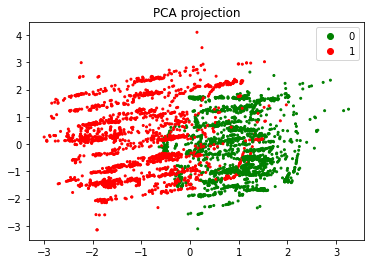

In [22]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(HostInputs)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=HostTargets, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



PCA projection of the dataset for the features used in the network models

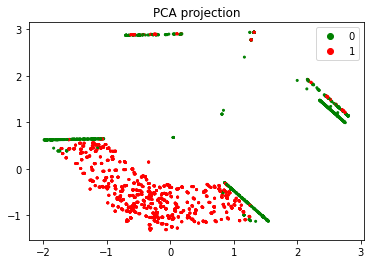

In [23]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(NetFlowInputsPortsInternal)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=NetflowTargetsIPS, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



Performs cross validation on the models, uses 5-fold cross validation. Creates confusion matrixes per model and displays the accuracy and F1 scores.

In [24]:
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
def crossValidate(model, Y_Pred, modelName, dataSet):
    
    if dataSet == "Host":
        Y_test = Y_Host_test
        X_test = X_Host_test
        Inputs = HostInputs
        Targets = HostTargets
    
    elif dataSet == "Network":
        Y_test = Y_test_Ports_Internal
        X_test = X_test_Ports_Internal
        Inputs = NetFlowInputsPortsInternal
        Targets = NetflowTargetsIPS
    CV_results = cross_validate(model, Inputs, Targets.ravel(), cv=5,return_train_score=True)
    training = CV_results["train_score"]
    testing = CV_results["test_score"]
    plt.boxplot([training, testing])
    plt.xticks([1, 2], ['training', 'testing'])
    plt.title('crossvalidation scores for {} - {}'.format(modelName, dataSet))
    plt.show()
    labels = [0,1]
    c = sklearn.metrics.confusion_matrix(Y_test, Y_Pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=c,
                           display_labels=[0,1])
    disp.plot()
    plt.title('Confusion matrix of {} - {}'.format(modelName, dataSet))
    plt.show()
    
    count = 0
    for N in range(len(Y_Pred)):
        if Y_Pred[N] == Y_test[N]:
            count = count + 1
            
    accuracy = count/len(Y_Pred)
    print("Accuracy: "+ str(accuracy))
    F1Score = sklearn.metrics.f1_score(Y_test, Y_Pred)
    print("F1 Score: " + str(F1Score))
    return([training, testing, accuracy, F1Score])



Graphs the cross validation results for all models into box plots, one for training and one for testing and then creates bar graphs with the associated F1 and accuracy scores.

In [25]:
def OverallResults(CVResults, type):
    boxPlotTrainData = []
    boxPlotTestData = []
    accuracyResults = []
    F1Results = []
    models = []
    for i in CVResults.keys():
        boxPlotTrainData.append(CVResults[i][0])
        boxPlotTestData.append(CVResults[i][1])
        accuracyResults.append(CVResults[i][2])
        F1Results.append(CVResults[i][3])
        models.append(i)
    plt.boxplot(boxPlotTrainData)
    plt.xticks([1,2,3,4,5,6,7,8,9], models, rotation = 'vertical')
    plt.title('crossvalidation scores for {} Models - training'.format(type))
    plt.show()
    plt.boxplot(boxPlotTestData)
    plt.xticks([1,2,3,4,5,6,7,8,9], models, rotation = 'vertical')
    plt.title('crossvalidation scores for {} Models - testing'.format(type))
    plt.show()
    N = 9
    ind = np.arange(N) 
    width = 0.35       
    plt.bar(ind, accuracyResults, width, label='Accuracy')
    plt.bar(ind + width, F1Results, width,
        label='F1')

    plt.ylabel('Scores')
    plt.title('Accuracy and F1 Scores - {}'.format(type))

    plt.xticks(ind + width / 2, models, rotation = 'vertical')
    plt.legend(loc='best')
    plt.ylim(0.8, 1.05)
    plt.show()


Cross Validating all the models, creating Confusion matrixs for each and recording the F1 and accuracy scores.

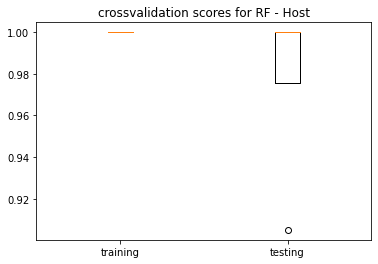

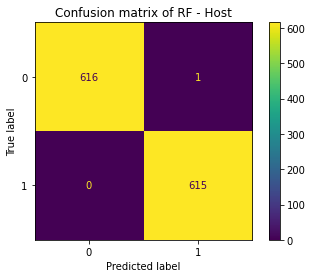

Accuracy: 0.9991883116883117
F1 Score: 0.9991876523151909


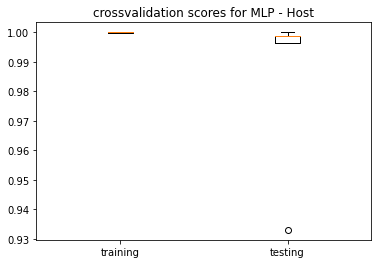

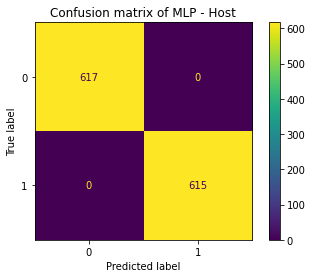

Accuracy: 1.0
F1 Score: 1.0


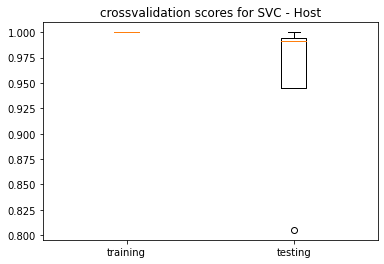

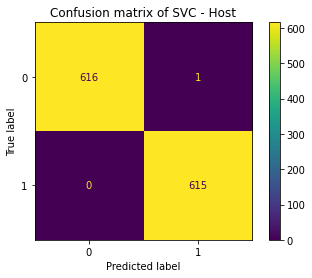

Accuracy: 0.9991883116883117
F1 Score: 0.9991876523151909


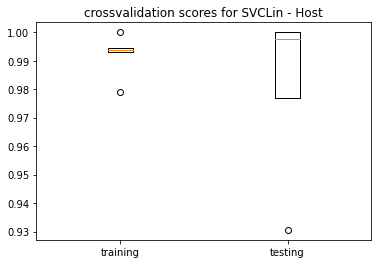

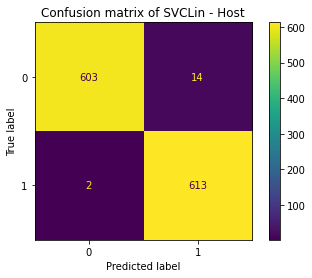

Accuracy: 0.987012987012987
F1 Score: 0.9871175523349436


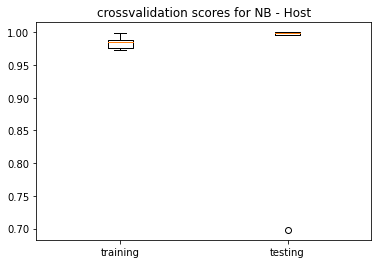

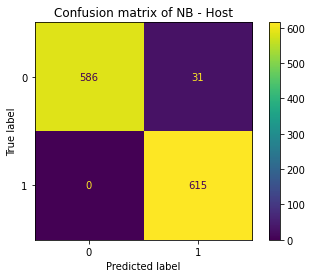

Accuracy: 0.9748376623376623
F1 Score: 0.9754163362410786


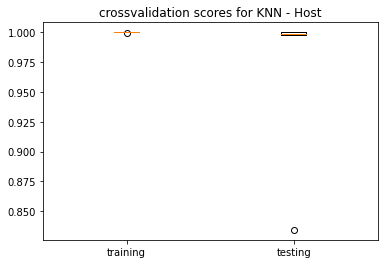

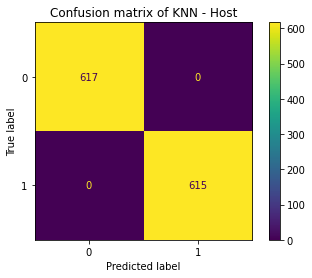

Accuracy: 1.0
F1 Score: 1.0


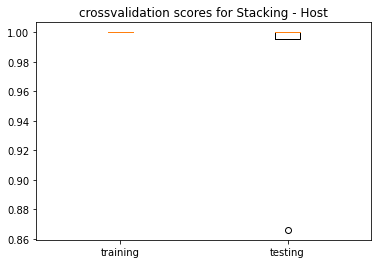

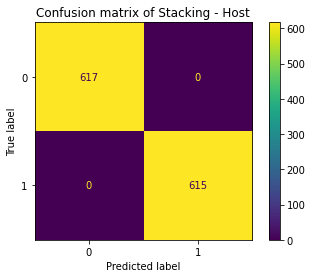

Accuracy: 1.0
F1 Score: 1.0


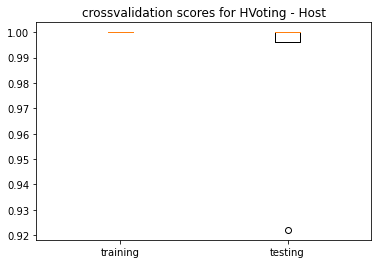

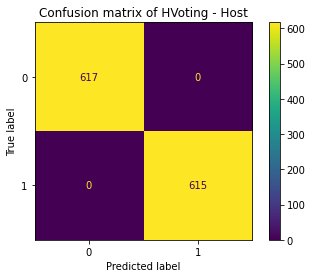

Accuracy: 1.0
F1 Score: 1.0


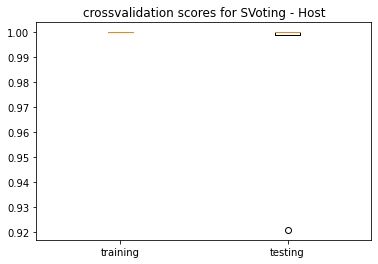

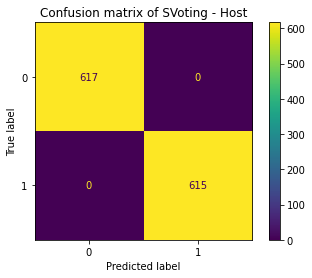

Accuracy: 1.0
F1 Score: 1.0


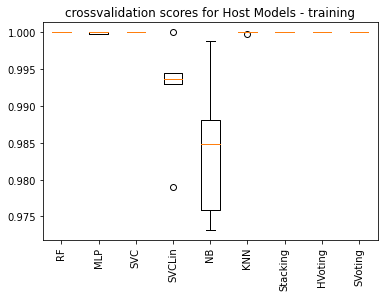

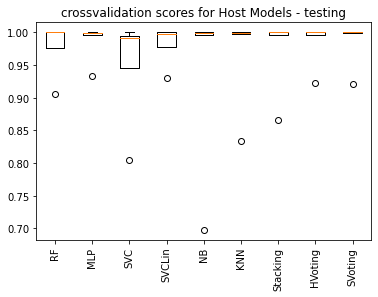

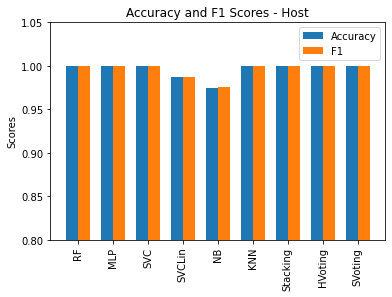

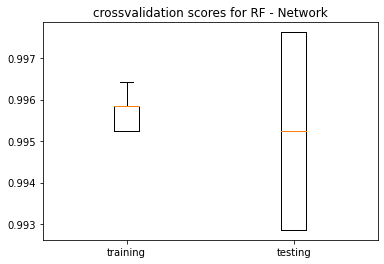

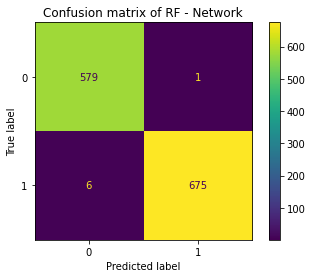

Accuracy: 0.9944488501189532
F1 Score: 0.9948415622697127


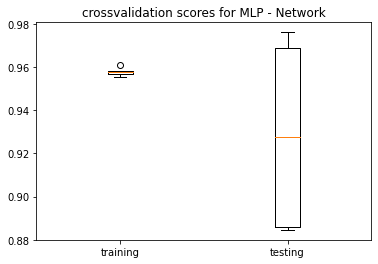

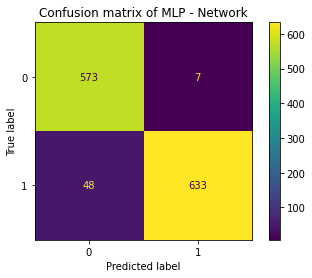

Accuracy: 0.9563838223632039
F1 Score: 0.9583648750946253


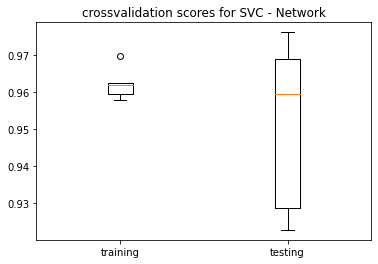

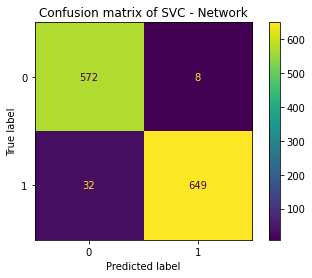

Accuracy: 0.9682791435368755
F1 Score: 0.9701046337817638


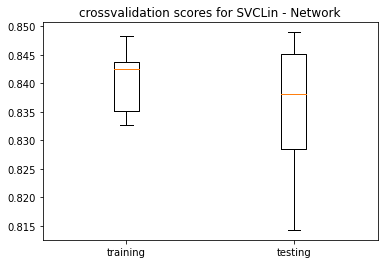

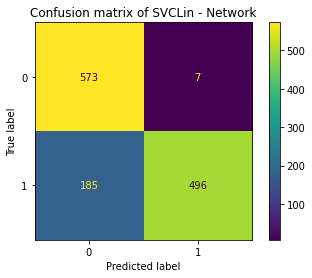

Accuracy: 0.8477398889770024
F1 Score: 0.8378378378378378


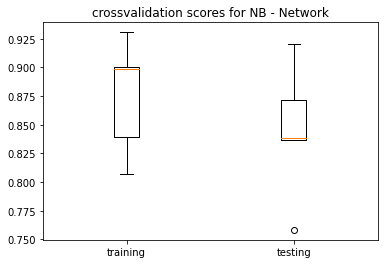

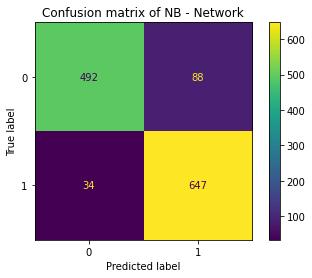

Accuracy: 0.9032513877874703
F1 Score: 0.9138418079096045


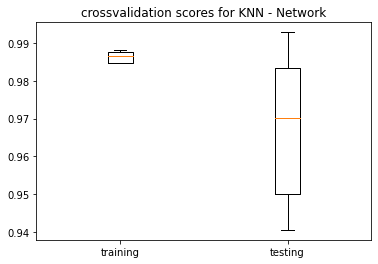

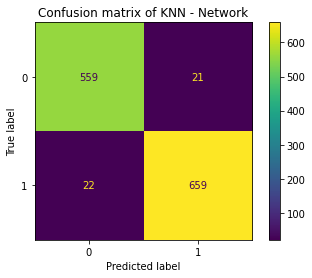

Accuracy: 0.9659000793021412
F1 Score: 0.9684055841293167


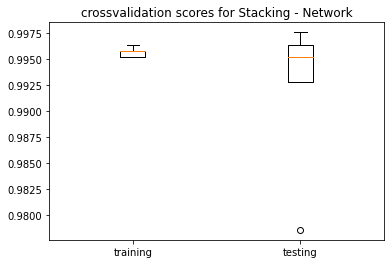

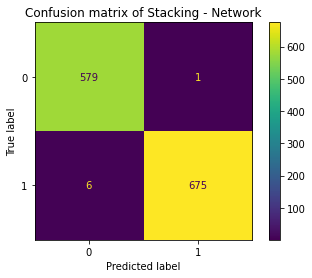

Accuracy: 0.9944488501189532
F1 Score: 0.9948415622697127


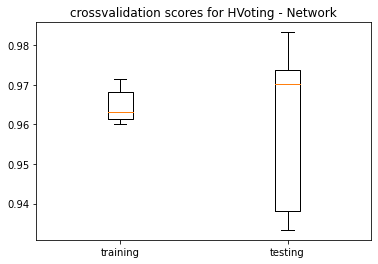

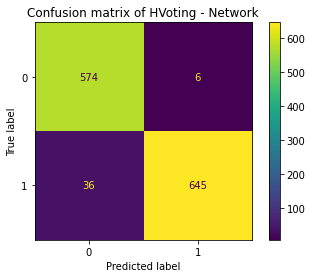

Accuracy: 0.9666931007137193
F1 Score: 0.9684684684684685


C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


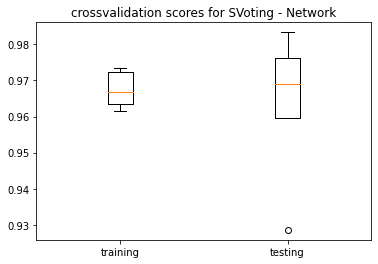

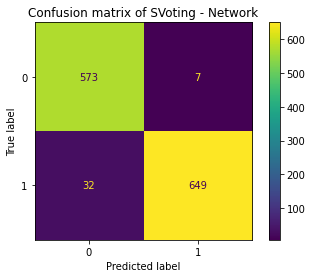

Accuracy: 0.9690721649484536
F1 Score: 0.9708302169035153


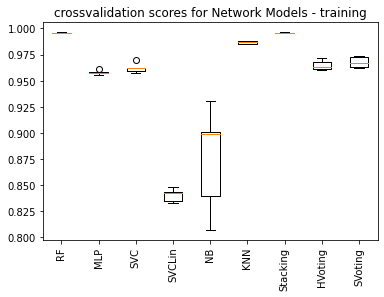

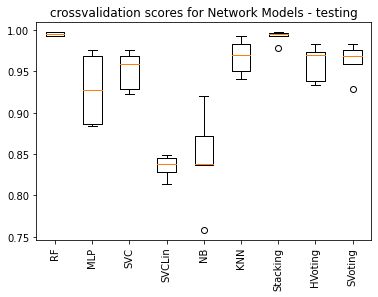

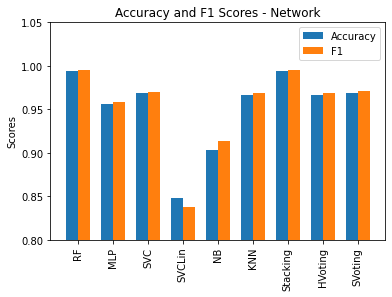

In [26]:

HostCVResults = {}
for model in HostList.keys():
    CVResults = crossValidate(HostList[model][0], HostList[model][1], model, "Host")
    HostCVResults[model] = CVResults

OverallResults(HostCVResults, "Host")

InternalCVResults = {}
for model in InternalList.keys():
    CVResults = crossValidate(InternalList[model][0], InternalList[model][1], model, "Network")
    InternalCVResults[model] = CVResults
OverallResults(InternalCVResults, "Network")

